## 1. Entendimento do Problema e Definição de Objetivos

•	Tarefa: Analisar o problema proposto pelo conjunto de dados escolhido. Entender a natureza do problema (classificação binária, multiclasse ou regressão) e definir claramente os objetivos do projeto.

## 2. Coleta e Preparação de Dados

•	Tarefa: Realizar o carregamento do dataset e fazer uma análise exploratória inicial. Isso inclui uma análise detalhada das variáveis, tipos de dados, presença de valores nulos ou inconsistências.

	•	Subtarefas:
	•	Remover ou preencher valores ausentes.
	•	Normalizar e padronizar as variáveis (se necessário).
	•	Codificar variáveis categóricas (se aplicável).

### Importando o Dataset pelo Kaggle

In [65]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate


from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, make_scorer, f1_score, r2_score

from sklearn.model_selection import GridSearchCV

In [ ]:
# Download latest version
path = kagglehub.dataset_download("uciml/adult-census-income")

# Carregar o arquivo CSV no DataFrame
df = pd.read_csv(f"{path}/adult.csv")

In [3]:
# Definir opções para mostrar todas as colunas e linhas
pd.set_option('display.max_columns', None)  # Mostra todas as colunas
pd.set_option('display.max_rows', None)     # Mostra todas as linhas
pd.set_option('display.max_colwidth', None) # Mostra o conteúdo completo de cada coluna

## 3. Análise Exploratória de Dados (EDA)

•	Tarefa: Realizar uma análise exploratória de dados aprofundada para entender as correlações entre as variáveis, distribuições e possíveis padrões.
	•	Subtarefas:
	•	Criar gráficos (distribuição, histogramas, box plots, etc.).
	•	Analisar correlações entre as variáveis.
	•	Identificar variáveis que podem ser eliminadas ou combinadas.

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


### Target

- Ver o Balanceamento entre classes

In [8]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Podemos ver que há um desbalanceamento entre as classes. Teremos que tratar isto.

### Valores "?"

In [9]:
# Contar quantos "?" existem em cada coluna
contagem_interrogacoes = (df == '?').sum()/len(df)*100
print(contagem_interrogacoes)

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64


In [ ]:
# Criar um novo DataFrame aplicando a condição

df[['workclass',"occupation","native.country"]] = df[['workclass',"occupation","native.country"]].map(lambda x: "Unknown" if x == "?" else x)

- Considerando que a fração de pessoas que tiveram ganho ou perda de capital é bem pequena, 8.3% para ganho e 4.7% para perda, podemos codificar as colunas para valores binários (True/False ou 1/0)

In [ ]:
# Criar um novo DataFrame aplicando a condição
#df_codificado = df.copy()
#df_codificado[['capital.gain',"capital.loss"]] = df_codificado[['capital.gain',"capital.loss"]].map(lambda x: True if x > 0 else False)

### Distribuição de fnlwgt

Text(0.5, 1.0, 'Boxplot de fnlwgt')

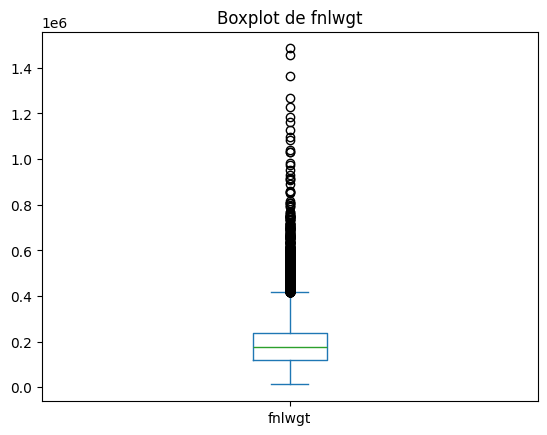

In [19]:
coluna = "fnlwgt"
df[coluna].plot.box()
plt.title(f"Boxplot de {coluna}")

In [50]:
def histograma(df,coluna):
    plt.figure(figsize=(15, 6))
    counts, bins, patches = plt.hist(df[coluna], bins=10, edgecolor='black', alpha=0.7)

    # Adicionar os valores acima das barras
    for count, x in zip(counts, bins):
        plt.text(x + 0.1, count, str(int(count)), ha='center', va='bottom')

    # Configurações do gráfico
    plt.title('Histograma da Coluna "valores"')
    plt.xlabel('Valores')
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)

    # Mostrar o gráfico
    plt.show()

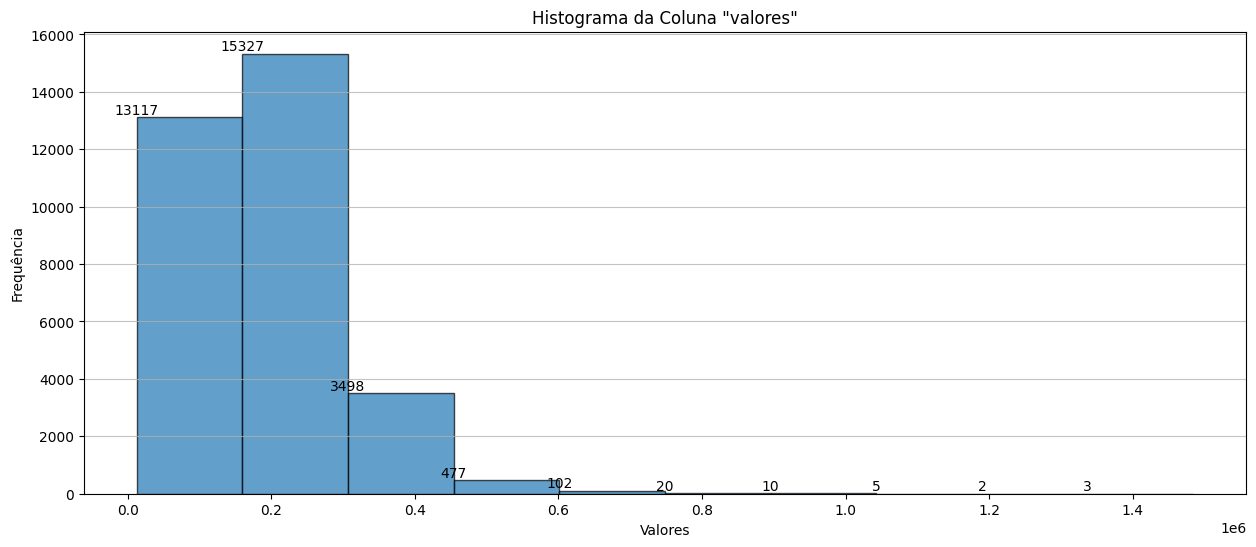

In [40]:
#Criar o histograma
histograma("fnlwgt")

Valores acima de 0.6 milhões aparentam ser ruídos. Vamos retirar

In [22]:
df_truncado = df[df["fnlwgt"] <= 600000]

### Education

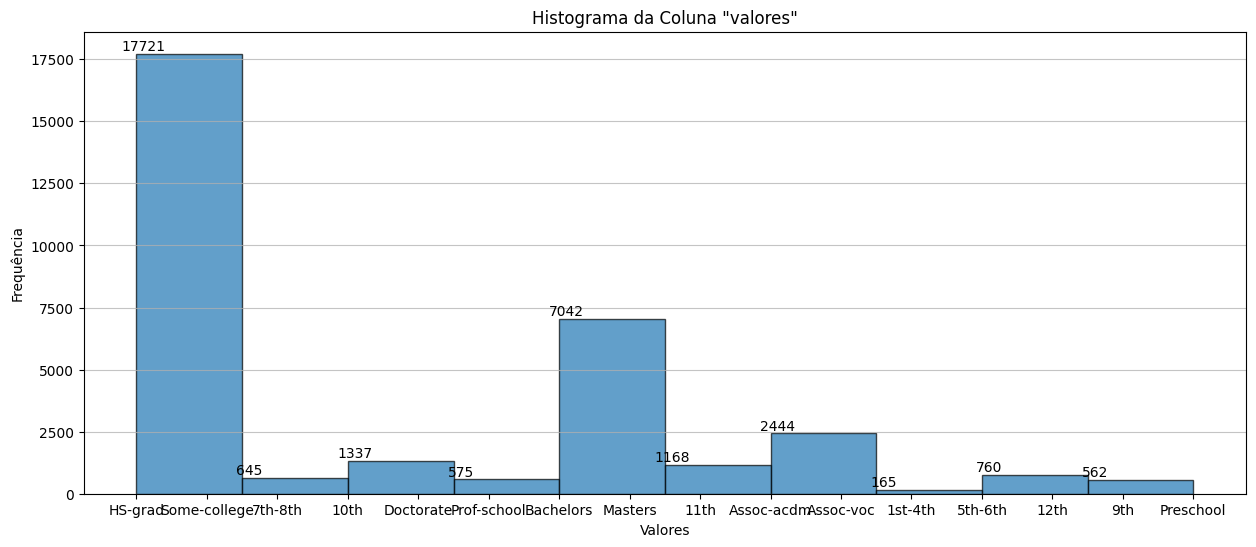

In [51]:
histograma(df_truncado,"education")

### Capital Loss and Gain

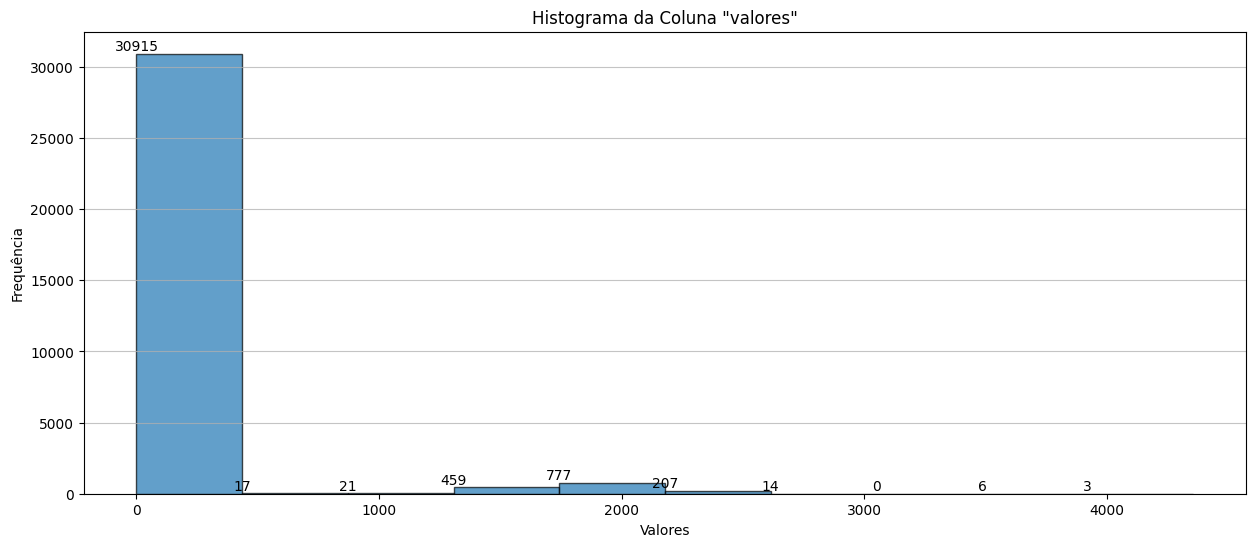

In [52]:
histograma(df_truncado,"capital.loss")

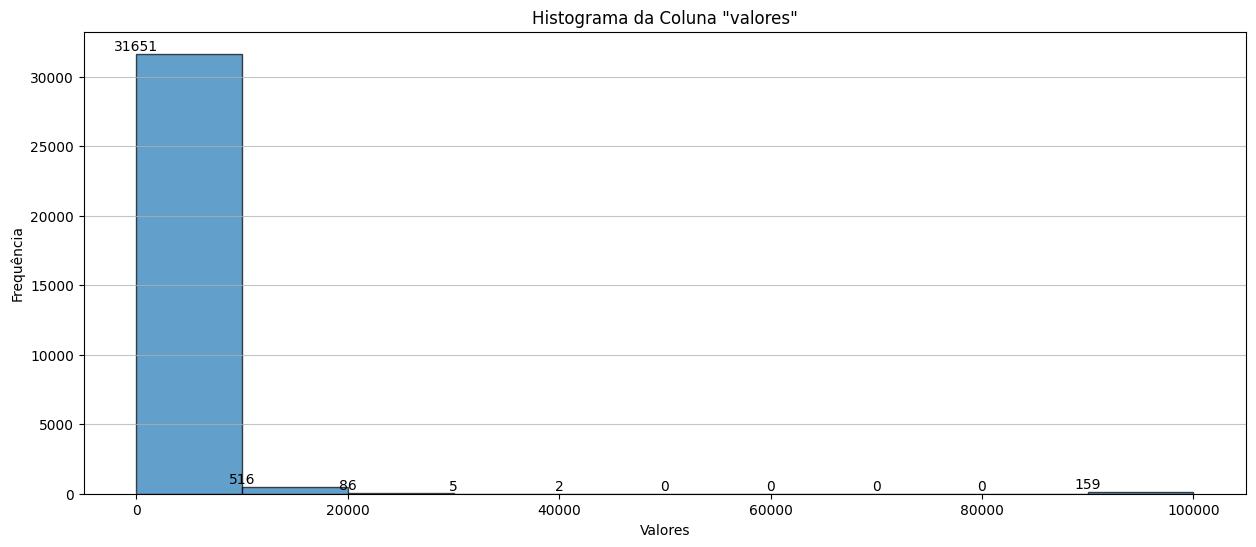

In [53]:
histograma(df_truncado,"capital.gain")

O desbalanceamento é muito, por volta de 90% para valores 0. Isso por enviesar o modelo, portanto vamos remover essas colunas do treinamento.

In [36]:
df_codificado = df_truncado.drop(columns=["capital.gain", "capital.loss"])
df_codificado = df_codificado.reset_index(drop=True)

In [37]:
df_codificado.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K


### Marital Status and Relationship

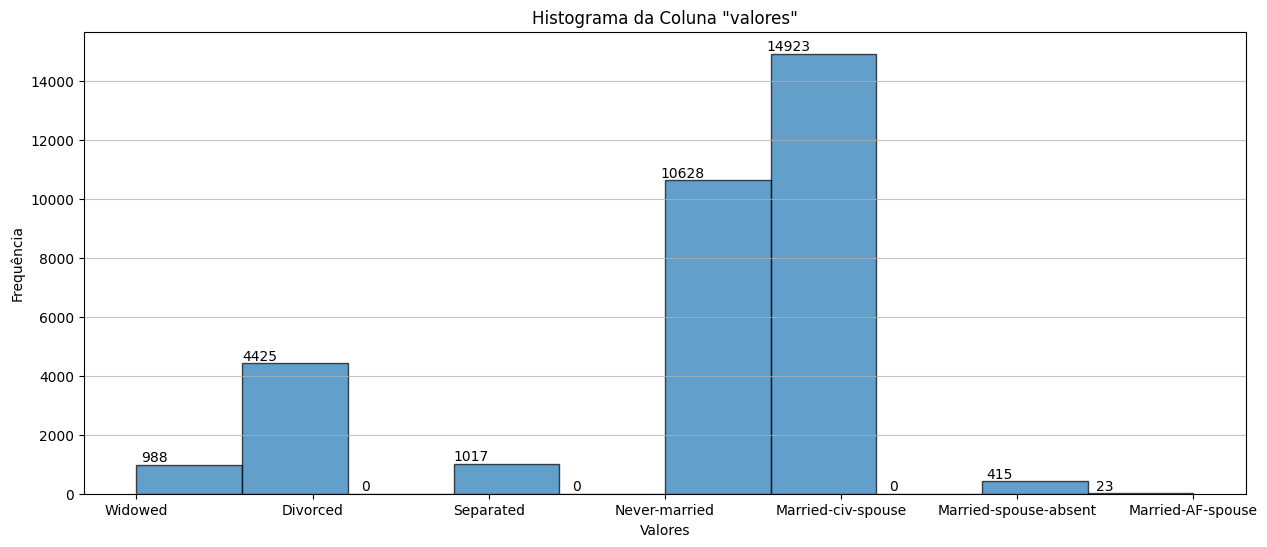

In [54]:
histograma(df_truncado,"marital.status")

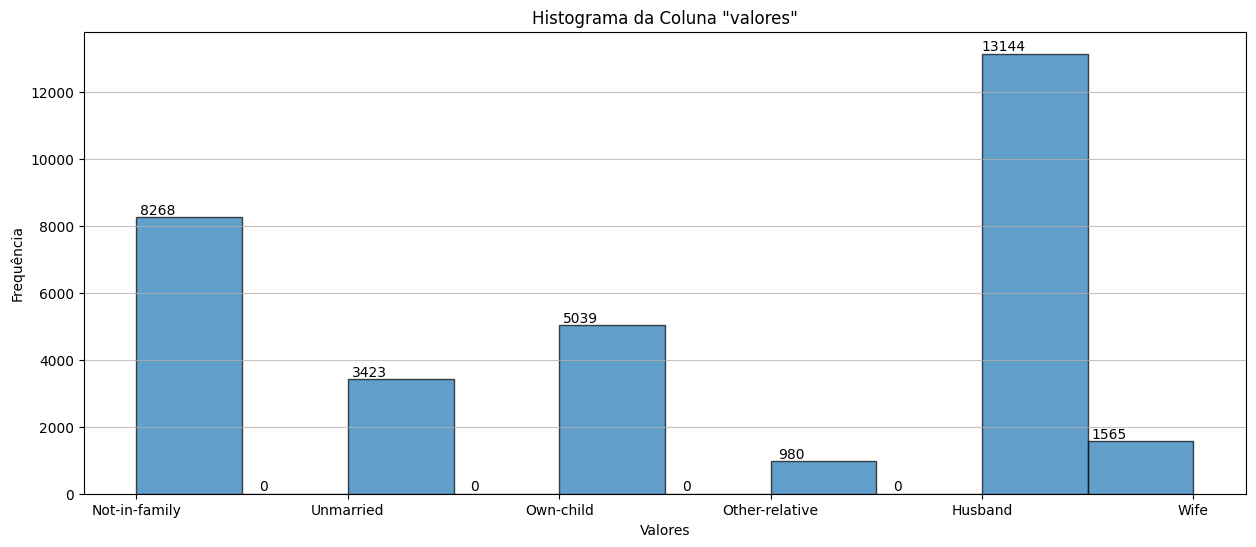

In [55]:
histograma(df_truncado,"relationship")

### Race and Sex

In [47]:
df_truncado["sex"].value_counts()

sex
Male      21695
Female    10724
Name: count, dtype: int64

In [48]:
df_truncado["race"].value_counts()

race
White                 27719
Black                  3079
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

### Hour per Week

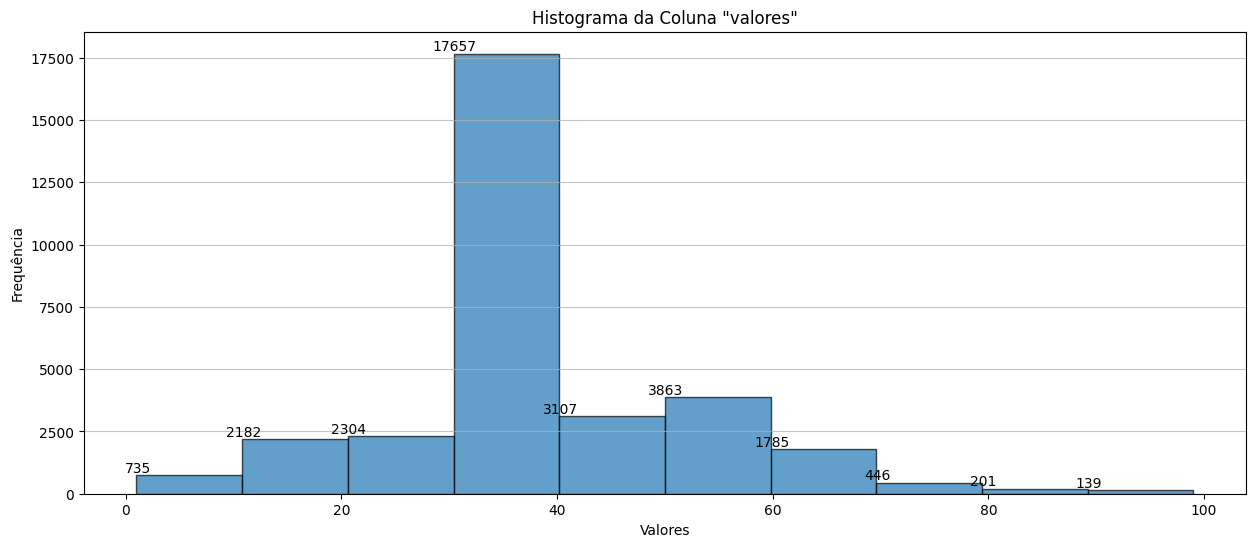

In [56]:
histograma(df_truncado,"hours.per.week")

trabalhar 80 horas semanais ou mais parece um absurdo. Uma semana tem 168 horas. Existem pessoas que realmente trabalham isso ou mais, com uma sobrecarga. Vamos manter por enquanto.

## 4. Divisão dos Dados em Conjuntos de Treinamento e Teste

•	Tarefa: Dividir o dataset em treinamento e teste (usualmente 80%/20%) para garantir a capacidade do modelo de generalizar bem a novos dados.

In [60]:
# Dividir o dataset em treinamento e teste
dataset = df_truncado.copy()

X, y = dataset.drop(columns=["education", "income"]), dataset["income"]


In [61]:
y.value_counts(normalize=True)

income
<=50K    0.75903
>50K     0.24097
Name: proportion, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state= 42)

## 5. Escolha e Implementação de Algoritmos

•	Tarefa: Escolher um ou mais algoritmos de aprendizado supervisionado para treinar o modelo. Testar diferentes algoritmos e ajustar seus hiperparâmetros para melhorar a performance.

•	Algoritmos sugeridos: Logistic Regression, Decision Trees, Random Forest, KNN Classifier/Regression etc.


### Decision Trees

In [67]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

In [68]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

f1 = make_scorer(f1_score, pos_label="bom")

# ====================

param_grid = {"classifier__weights" : ["uniform"],
              # "knn__algorithm" : ['ball_tree', 'kd_tree', 'brute'],
              "classifier__metric" : ["manhattan", "euclidean"],
              "classifier__n_neighbors" : range(3, 7)}

In [69]:
grid = GridSearchCV(estimator=pipe, scoring=f1, cv=splitter, param_grid=param_grid, verbose=1)

In [70]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ~~~~~~~~~~~~~~~~~~~~~~~~^
        cloned_transformer,
        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
        params=routed_params[name],
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_set_output.py", line 316, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ~~~~~~~~^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py", line 878, in fit
    return self.partial_fit(X, y, sample_weight)
           ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_data.py", line 914, in partial_fit
    X = self._validate_data(
        X,
    ...<3 lines>...
        reset=first_call,
    )
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_array_api.py", line 745, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\dupga\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Private'


## 6. Avaliação do Modelo

•	Tarefa: Avaliar o desempenho do modelo usando métricas apropriadas para o tipo de problema.

•	Classificação:
	•	Métricas: Acurácia, Precisão, Revocação, F1-Score, AUC-ROC.
	•	Regressão:
	•	Métricas: RMSE, MAE, R².

## 7. Ajuste de Hiperparâmetros e Tuning do Modelo

•	Tarefa: Utilizar técnicas como `Grid Search` ou `Random Search` para ajustar hiperparâmetros e melhorar o desempenho do modelo.

## 8. Validação Cruzada e Teste Final

•	Tarefa: Aplicar validação cruzada para verificar a robustez do modelo e garantir que ele não esteja superajustado (overfitting). Em seguida, realizar o teste final no conjunto de teste.


## 9. Interpretação dos Resultados e Conclusão

•	Tarefa: Interpretar os resultados do modelo, destacando insights importantes, limitações e sugestões para melhorias futuras.